In [12]:
import pandas as pd
import pylab as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import os

os.chdir('C:\\Users\\NITHIN\\Desktop\\Data Science\\Data sets')

In [13]:
# read the data in
df = pd.read_csv("diabetes.csv")
print(df.columns.values)
df.head()

['times_pregnant' 'Plasma_glucose_concentration_2 hr' 'blood_pressure'
 ' Triceps_skin_fold_thickness ' ' Hr2_serum_insulin' 'BOI'
 ' Diabetes_pedigree_function' 'Age' 'Class']


,times_pregnant,Plasma_glucose_concentration_2 hr,blood_pressure,Triceps_skin_fold_thickness,Hr2_serum_insulin,BOI,Diabetes_pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# target variable % distribution
print(df['Class'].value_counts(normalize=True))

0    0.651042
1    0.348958
Name: Class, dtype: float64


In [15]:
#build a quick logistic regression model and check the accuracy

X = df.iloc[:,:8] # independent variables
y = df['Class'] # dependent variables

In [16]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [19]:
# instantiate a logistic regression model, and fit
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [23]:
# predict class labels for the train set. The predict fuction converts probability values > .5 to 1 else 0
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [21]:
# generate class probabilities
# Notice that 2 elements will be returned in probs array,

probs = model.predict_proba(X_test)


In [25]:
# 1st element is probability for negative class,
# 2nd element gives probability for positive class
probs

array([[ 0.10988001,  0.89011999],
       [ 0.78965152,  0.21034848],
       [ 0.8593293 ,  0.1406707 ],
       [ 0.39141218,  0.60858782],
       [ 0.82589411,  0.17410589],
       [ 0.92348035,  0.07651965],
       [ 0.32355693,  0.67644307],
       [ 0.25748181,  0.74251819],
       [ 0.59415329,  0.40584671],
       [ 0.62385934,  0.37614066],
       [ 0.45844292,  0.54155708],
       [ 0.10473089,  0.89526911],
       [ 0.69191157,  0.30808843],
       [ 0.7779809 ,  0.2220191 ],
       [ 0.83030203,  0.16969797],
       [ 0.79534704,  0.20465296],
       [ 0.19606098,  0.80393902],
       [ 0.93026147,  0.06973853],
       [ 0.59201268,  0.40798732],
       [ 0.6860012 ,  0.3139988 ],
       [ 0.42870789,  0.57129211],
       [ 0.64719586,  0.35280414],
       [ 0.64379711,  0.35620289],
       [ 0.90353786,  0.09646214],
       [ 0.89742648,  0.10257352],
       [ 0.6203313 ,  0.3796687 ],
       [ 0.91312868,  0.08687132],
       [ 0.17881772,  0.82118228],
       [ 0.82043398,

In [28]:
#probability for positive class
y_pred_prob = probs[:, 1]


[ True False False False False False False  True False False False  True
 False False False False  True False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False  True False False False False False False False
 False False False  True False  True False False False False False False
 False  True  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False  T

In [31]:
# generate evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.78354978355


In [34]:
# extract false positive, true positive rate
fpr, tpr,thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.838612


In [54]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr,
index = i),'1-fpr' : pd.Series(1-fpr, index = i)})

print(roc)

        1-fpr       fpr       tpr
0    1.000000  0.000000  0.005155
1    1.000000  0.000000  0.030928
2    0.997085  0.002915  0.030928
3    0.997085  0.002915  0.072165
4    0.994169  0.005831  0.072165
5    0.994169  0.005831  0.077320
6    0.991254  0.008746  0.077320
7    0.991254  0.008746  0.190722
8    0.988338  0.011662  0.190722
9    0.988338  0.011662  0.206186
10   0.985423  0.014577  0.206186
11   0.985423  0.014577  0.221649
12   0.982507  0.017493  0.221649
13   0.982507  0.017493  0.247423
14   0.979592  0.020408  0.247423
15   0.979592  0.020408  0.268041
16   0.976676  0.023324  0.268041
17   0.976676  0.023324  0.314433
18   0.973761  0.026239  0.314433
19   0.973761  0.026239  0.324742
20   0.970845  0.029155  0.324742
21   0.970845  0.029155  0.329897
22   0.967930  0.032070  0.329897
23   0.967930  0.032070  0.335052
24   0.965015  0.034985  0.335052
25   0.965015  0.034985  0.340206
26   0.962099  0.037901  0.340206
27   0.962099  0.037901  0.355670
28   0.956268 

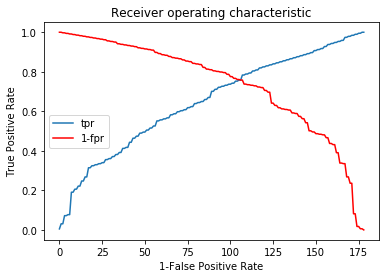

In [33]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'], label='tpr')
plt.plot(roc['1-fpr'], color = 'red', label='1-fpr')
plt.legend(loc='best')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [34]:
#Which Error is Costly??


# Rare Event or Imbalanced Dataset

Providing an equal samples of positive and negative instances to the classification algorithm will result in an optimal result. Datasets that are highly skewed toward one or more classes have proven to be a challenge.

Resampling is a common practice to address the imbalanced dataset issue.

#Random under-sampling - Reduce majority class to match minority class count.

#Random over-sampling - Increase minority class by randomly picking samples within minority class till counts of both class match.

#Synthetic Minority Over-Sampling Technique (SMOTE) - Increase minority class by introducing synthetic examples through connecting all k (default = 5) minority class nearest neighbors using feature space similarity (Euclidean distance).

# Bias and Variance
A fundamental problem with supervised learning is the bias variance trade-off. Ideally a model should have two key characteristics.
1. Sensitive enough to accurately capture the key patterns in the training dataset.
2. It should be generalized enough to work well on any unseen datasets.
Unfortunately, while trying to achieve the above-mentioned first point, there is an ample chance of over-fitting to noisy or unrepresentative training data points leading to a failure of generalizing the model. On the other hand, trying to generalize a model may result in failing to capture important regularities.

### Bias
If model accuracy is low on a training dataset as well as test dataset the model is said to be under-fitting or that the model has high bias. This means the model is not fitting the training dataset points well in regression or the decision boundary is not separating the classes well in classification; and two key reasons for bias are 1) not including the right features, and 2) not picking the correct order of polynomial degrees for model fitting.

To solve an under-fitting issue or to reduced bias, try including more meaningful features and try to increase the model complexity by trying higher-order polynomial fittings.

### Variance
If a model is giving high accuracy on a training dataset, however on a test dataset the accuracy drops drastically, then the model is said to be over-fitting or a model that has high variance. The key reason for over-fitting is using higher-order polynomial degree (may not be required), which will fit decision boundary tools well to all data points including the noise of train dataset, instead of the underlying relationship. This will lead to a high accuracy (actual vs. predicted) in the train dataset and when applied to the test dataset, the prediction error will be high.
To solve the over-fitting issue:

#Try to reduce the number of features, that is, keep only the meaningful features.
#Dimension reduction can eliminate noisy features, in turn, reducing the model variance.
#Brining more data points to make training dataset large will also reduce variance.
#Choosing right model parameters can help to reduce the bias and variance, for example.
   #Using right regularization parameters can decrease variance in regression-based models.
   #For a decision tree reducing the depth of the decision tree will reduce the variance. 

# K-Fold Cross-Validation

K-folds cross-validation splits the training dataset into k-folds without replacement, that is, any given data point will only be part of one of the subset, where k-1 folds are used for the model training and one fold is used for testing. The procedure is repeated k times so that we obtain k models and performance estimates.

In [45]:
from sklearn.cross_validation import cross_val_score

df = pd.read_csv("diabetes.csv")

X = df.iloc[:,:8].values # independent variables
y = df['Class'].values # dependent variables

In [48]:
# Normalize Data
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [49]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2017)

In [50]:
# build a decision tree classifier
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import train_test_split
clf = tree.DecisionTreeClassifier(random_state=2017)

In [51]:
# evaluate the model using 10-fold cross-validation
train_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
test_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
print("Train Fold AUC Scores: ", train_scores)
print("Train CV AUC Score: ", train_scores.mean())

Train Fold AUC Scores:  [ 0.7037037   0.63888889  0.65420561  0.6635514   0.71028037]
Train CV AUC Score:  0.674125995154


In [53]:
print("\nTest Fold AUC Scores: ", test_scores)
print("Test CV AUC Score: ", test_scores.mean())


Test Fold AUC Scores:  [ 0.70212766  0.74468085  0.74468085  0.64444444  0.66666667]
Test CV AUC Score:  0.700520094563


# Stratified K-Fold Cross-Validation
An extended cross-validation is the Stratified K-fold cross-validation, where the class proportions are preserved in each fold, leading to better
bias and variance estimates

# Ensemble Methods
Ensemble methods enable combining multiple model scores into a single score to create a robust generalized model.
At a high level there are two types of ensemble methods.
1. Combine multiple models of similar type
     #### Bagging (Bootstrap aggregation)
        Bootstrap aggregation (also known as bagging) was proposed by Leo Breiman in 1994, which is a model aggregation technique to reduce model variance. The training data is split into multiple samples with replacements called bootstrap samples. Bootstrap sample size will be the same as the original sample size, with 3/4th of the original values and replacement result in repetition of values
     
         Independent models on each of the bootstrap samples are built, and the average of the predictions for regression or majority vote for classification is used to create the final model.
 
         Random Forest
         
     #### Boosting
         The core concept of boosting is that rather than an independent individual hypothesis, combining hypotheses in a sequential order increases the accuracy. Essentially, boosting algorithms convert the weak learners into strong learners. Boosting algorithms are well designed to address the bias problems.
         
         At a high level the AdaBoosting (adaptive boosting) process can be divided into three steps.
         1. Assign uniform weights for all data points W0(x) = 1 / N, where N is the total number of training data points.
         2. At each iteration fit a classifier ym(xn) to the training data and update weights to minimize the weighted error function.
         3. The final model.
         
         
         
